# Big Mart Sales Prediction


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

The solution is divided into the following sections:

Data understanding and exploration (EDA)
Data Preprocessing
Model building and evaluation
Predictions

Import libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Reading dataset 

In [61]:
data_train=pd.read_csv(r"C:\Users\Dell\Downloads\train_v9rqX0R.csv")
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Exploratory data analysis

In [62]:
data_train.shape

(8523, 12)

In [63]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [64]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [65]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


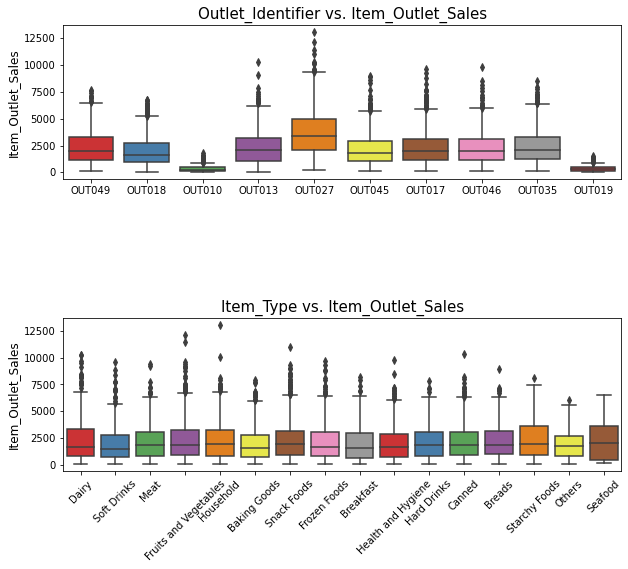

In [66]:
plt.figure(figsize=(10,8))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data_train, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data_train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

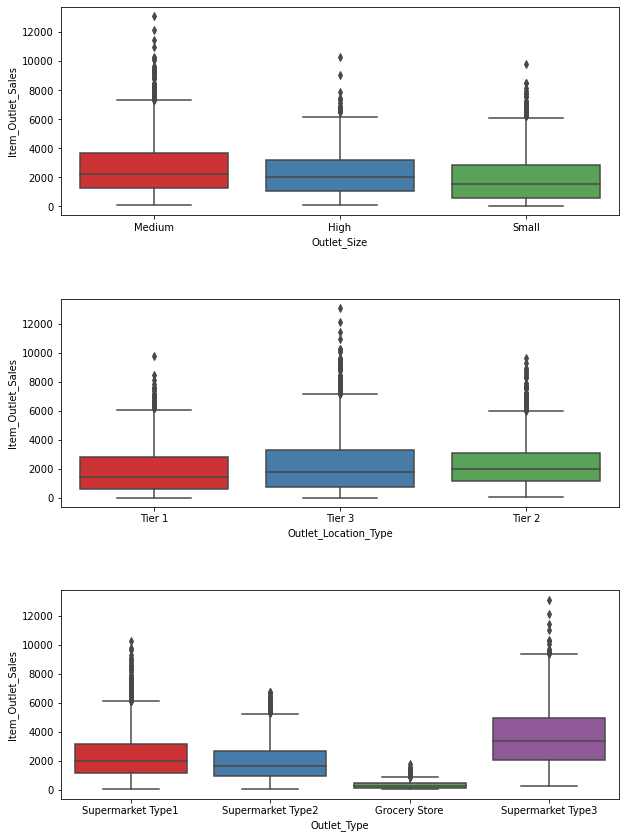

In [67]:
plt.figure(figsize = (10,8))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data_train, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data_train, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data_train, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

Handling missing values

In [68]:
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

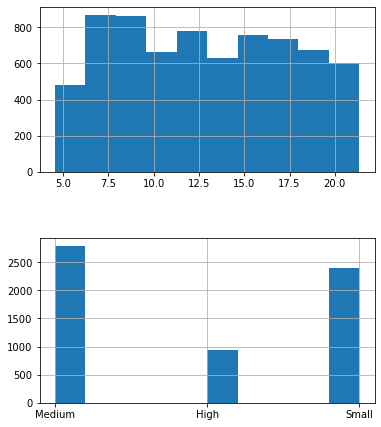

In [69]:
plt.figure(figsize = (6,4))

plt.subplot(211)
data_train['Item_Weight'].hist()

plt.subplot(212)
data_train['Outlet_Size'].hist()

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

In [70]:
data_train['Item_Weight']=data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean())

In [71]:
mode_oz = data_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [72]:
missing_values = data_train['Outlet_Size'].isnull() 

In [73]:
data_train.loc[missing_values, 'Outlet_Size'] = data_train.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_oz[x])

In [74]:
data_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [75]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Encoding

In [76]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()
  

data_train['Item_Identifier']= label_encoder.fit_transform(data_train['Item_Identifier'])
  
data_train['Item_Identifier'].unique()


array([ 156,    8,  662, ..., 1323, 1524, 1519])

In [77]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [78]:
data_train['Item_Fat_Content'].replace("reg","Regular",inplace=True)

In [79]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    3006
LF          316
low fat     112
Name: Item_Fat_Content, dtype: int64

In [80]:
data_train['Item_Fat_Content']= label_encoder.fit_transform(data_train['Item_Fat_Content'])

In [81]:
data_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [82]:
data_train['Item_Type']= label_encoder.fit_transform(data_train['Item_Type'])

In [83]:
data_train['Outlet_Identifier']= label_encoder.fit_transform(data_train['Outlet_Identifier'])

In [84]:
data_train['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [85]:
data_train['Outlet_Size']= label_encoder.fit_transform(data_train['Outlet_Size'])

In [86]:
data_train['Outlet_Location_Type'].unique()


array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [87]:
data_train['Outlet_Location_Type']= label_encoder.fit_transform(data_train['Outlet_Location_Type'])

In [88]:
data_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [89]:
data_train['Outlet_Type']= label_encoder.fit_transform(data_train['Outlet_Type'])

In [90]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [91]:
data_train.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.101936,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001229,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.019433,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.014105,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.101936,-0.019433,1.000000,0.038262,-0.126319,0.002626,-0.001140,-0.008895,-0.007461,-0.003519,-0.000867,0.017256
Item_Visibility,-0.025482,-0.012049,0.038262,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.094025,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.126319,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.000218,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.002626,-0.001315,0.032651,1.000000,0.003319,0.005020,0.000872,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.001140,-0.100439,0.001656,0.003319,1.000000,0.079035,0.260272,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.008895,-0.074834,0.004970,0.005020,0.079035,1.000000,0.425534,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001229,-0.014105,-0.007461,0.094025,-0.000218,0.000872,0.260272,0.425534,1.000000,-0.480075,-0.401373,-0.162753
Outlet_Location_Type,0.003656,0.004088,-0.003519,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.480075,1.000000,0.467219,0.089367


In [92]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [93]:
x=data_train.iloc[:,0:11].values
x

array([[1.560e+02, 9.300e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [8.000e+00, 5.920e+00, 2.000e+00, ..., 1.000e+00, 2.000e+00,
        2.000e+00],
       [6.620e+02, 1.750e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.357e+03, 1.060e+01, 1.000e+00, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [6.810e+02, 7.210e+00, 2.000e+00, ..., 1.000e+00, 2.000e+00,
        2.000e+00],
       [5.000e+01, 1.480e+01, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        1.000e+00]])

In [94]:
y=data_train['Item_Outlet_Sales'].values
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

Data modelling

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [96]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [97]:
lr.fit(x_train,y_train)

LinearRegression()

In [98]:
y_pred = lr.predict(x_test)
y_pred

array([ 573.60846924, 1584.48875124, 3204.90222533, ..., 1391.18331437,
       4070.09975274, 2889.86003285])

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1386452.1970022554

Importing test set

In [40]:
data_test=pd.read_csv(r"C:\Users\Dell\Downloads\test_AbJTz2l.csv")
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [41]:
data_test.shape

(5681, 11)

In [42]:
sales=pd.DataFrame(data_test[['Item_Identifier','Outlet_Identifier']])
sales.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [43]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [44]:
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

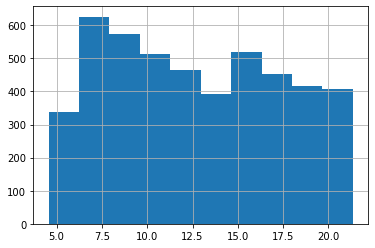

In [45]:
data_test['Item_Weight'].hist()

<AxesSubplot:>

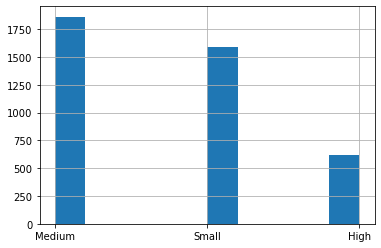

In [46]:
data_test['Outlet_Size'].hist()

In [47]:
data_test['Item_Weight']=data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean())

In [48]:
mode_oz = data_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_values = data_test['Outlet_Size'].isnull() 
data_test.loc[missing_values, 'Outlet_Size'] = data_test.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_oz[x])
data_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [49]:
data_test['Item_Identifier']= label_encoder.fit_transform(data_test['Item_Identifier'])


In [50]:
data_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [51]:
data_test['Item_Fat_Content'].replace("reg","Regular",inplace=True)

In [52]:
for i in ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    data_test[i]=label_encoder.fit_transform(data_test[i])

In [53]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,2,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [54]:
x_test=data_test.iloc[:,:11]
x_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,2,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [55]:
Item_Outlet_Sales = lr.predict(x_test)
Item_Outlet_Sales

array([1964.21100137, 1073.10945084, 2276.72187672, ..., 1716.65889999,
       3124.94733316, 1121.50012769])

In [57]:
sales['Item_Outlet_Sales'] = Item_Outlet_Sales

In [58]:
sales

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1964.211001
1,FDW14,OUT017,1073.109451
2,NCN55,OUT010,2276.721877
3,FDQ58,OUT017,2091.776160
4,FDY38,OUT027,5085.104160
...,...,...,...
5676,FDB58,OUT046,2353.526249
5677,FDD47,OUT018,3061.713607
5678,NCO17,OUT045,1716.658900
5679,FDJ26,OUT017,3124.947333


In [59]:
sales.to_csv('BigMarketSales.csv')